In [11]:
import pandas as pd
import statsmodels.api as sm
df = pd.read_csv('/content/penjualan.csv',sep = ',')
df.rename(columns={'price': 'price'}, inplace=True)
df.rename(columns={'rating': 'rating'}, inplace=True)
df

,orderdate,category,price,quantity,payment,rating
0,1-Jan,baju,$599.00,4,cash,3.9
1,1-Jan,kosmetik,$149.00,2,cod,4.4
2,1-Jan,baju,$298.00,6,cod,4.4
3,1-Jan,kosmetik,$245.00,5,cod,4.2
4,1-Jan,kosmetik,$422.00,3,cod,4.3
...,...,...,...,...,...,...
95,23-Jan,kosmetik,$611.93,2,cash,4.8
96,24-Jan,kosmetik,$611.93,1,cod,4.7
97,25-Jan,baju,$611.93,2,cod,4.9
98,26-Jan,baju,$611.93,1,cod,4.8


In [12]:
df = df.dropna()

In [13]:
# Menghapus simbol "$" dari kolom 'price' dan mengonversinya ke numerik
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
# Mengisi nilai kosong pada kolom 'rating' dengan nilai median
df['rating'].fillna(df['rating'].median(), inplace=True)
df = df.dropna()

<ipython-input-13-9734f0ae8b77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-13-9734f0ae8b77>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].median(), inplace=Tr

In [14]:
#Statistik deskriptif
df.describe()

,price,quantity,rating
count,89.000000,89.000000,89.000000
mean,1382.446629,3.044944,4.367416
std,1187.629430,1.751039,0.508289
min,101.000000,1.000000,2.500000
25%,611.930000,2.000000,4.200000
50%,980.400000,3.000000,4.400000
75%,1960.800000,5.000000,4.700000
max,6127.500000,8.000000,5.000000


In [21]:
# Variabel independen dan dependen
X = df[['price',]]  # Pilih fitur yang relevan
y = df['quantity']  # Target yang ingin diprediksi


In [22]:
# Menambahkan konstanta
X = sm.add_constant(X)

In [23]:
# Membuat model OLS
model = sm.OLS(y, X).fit()

In [24]:
# Menampilkan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.308
Date:                Thu, 26 Dec 2024   Prob (F-statistic):              0.256
Time:                        08:42:30   Log-Likelihood:                -174.98
No. Observations:                  89   AIC:                             354.0
Df Residuals:                      87   BIC:                             358.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2930      0.285     11.544      0.0

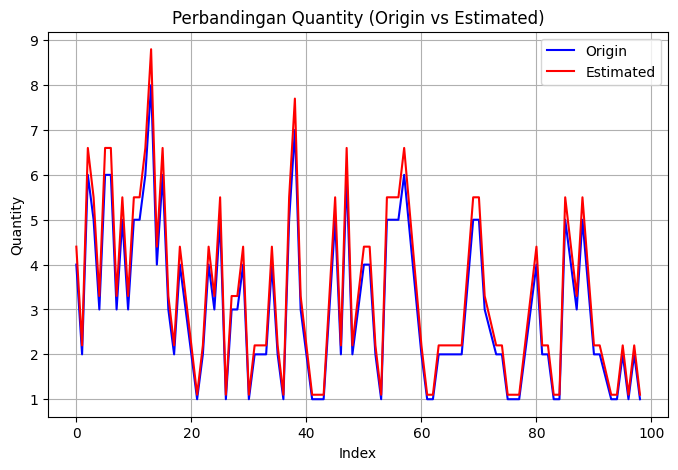

In [27]:
import matplotlib.pyplot as plt
# Contoh membuat data estimasi dari kolom quantity
df['quantity_estimated'] = df['quantity'] * 1.1  # Estimasi sebagai 10% lebih besar

# Membuat plot garis
plt.figure(figsize=(8, 5))
plt.plot(df.index, df['quantity'], color='blue', label='Origin')  # Garis asli
plt.plot(df.index, df['quantity_estimated'], color='red', label='Estimated')  # Garis estimasi

# Menambahkan label dan judul
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.title('Perbandingan Quantity (Origin vs Estimated)')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()
